# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('liquor_store_sales.csv')
data.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

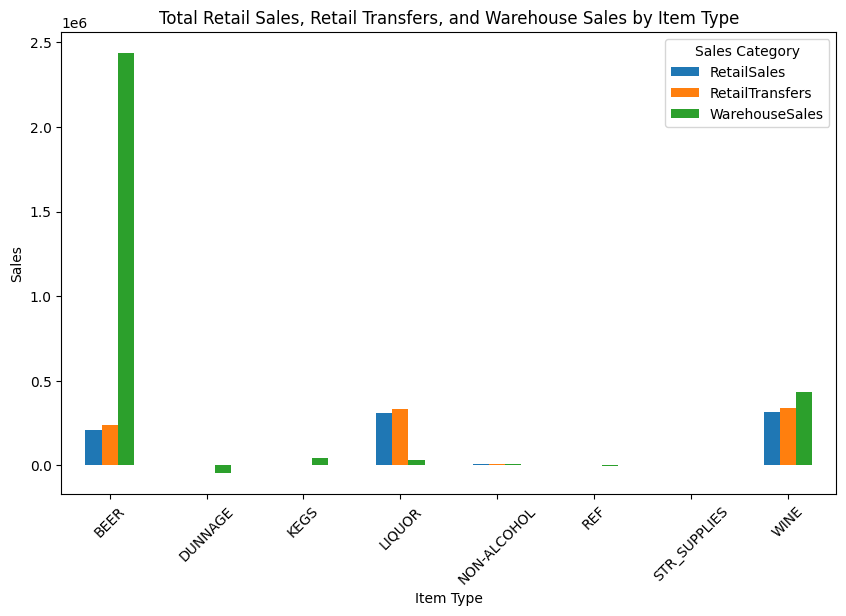

In [3]:

# Replace the column names in the required_columns list with the correct names from your DataFrame
required_columns = ['RetailSales', 'RetailTransfers', 'WarehouseSales']

# Group the data by 'ItemType' and calculate the sum of each category
grouped_data = data.groupby('ItemType')[required_columns].sum()

# Create the bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.title('Total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Sales Category')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

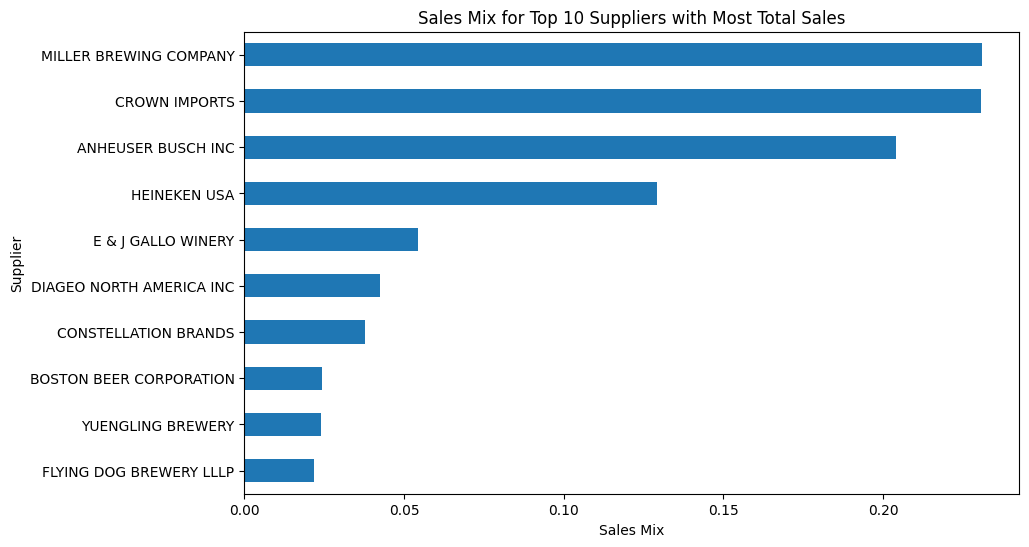

In [4]:
# Group the data by 'Supplier' and calculate the total sales for each supplier
supplier_total_sales = data.groupby('Supplier')[['RetailSales', 'WarehouseSales']].sum()
supplier_total_sales['TotalSales'] = supplier_total_sales['RetailSales'] + supplier_total_sales['WarehouseSales']

# Sort the data in descending order based on total sales
supplier_total_sales_sorted = supplier_total_sales.sort_values(by='TotalSales', ascending=False)

# Select the top 10 suppliers with the most total sales
top_10_suppliers = supplier_total_sales_sorted.head(10)

# Calculate the sales mix for each supplier
top_10_suppliers['SalesMix'] = top_10_suppliers['TotalSales'] / top_10_suppliers['TotalSales'].sum()

# Create the horizontal bar chart
top_10_suppliers['SalesMix'].plot(kind='barh', figsize=(10, 6))
plt.title('Sales Mix for Top 10 Suppliers with Most Total Sales')
plt.xlabel('Sales Mix')
plt.ylabel('Supplier')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales on top
plt.show()

## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

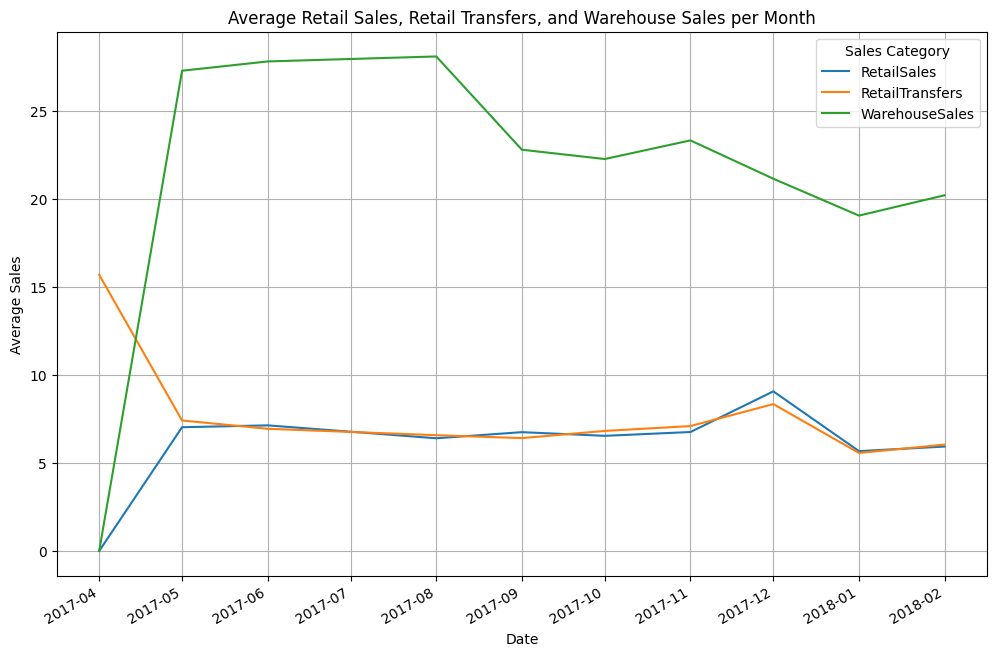

In [5]:

# Combine 'Year' and 'Month' columns and convert them to a date format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Group the data by 'Date' and calculate the average Retail Sales, Retail Transfers, and Warehouse Sales per month
average_sales_per_month = data.groupby('Date')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()

# Create the multi-line chart
average_sales_per_month.plot(kind='line', figsize=(12, 8))
plt.title('Average Retail Sales, Retail Transfers, and Warehouse Sales per Month')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Sales Category', loc='upper right')
plt.grid(True)
plt.show()

## 4. Plot the same information as above but as a bar chart.

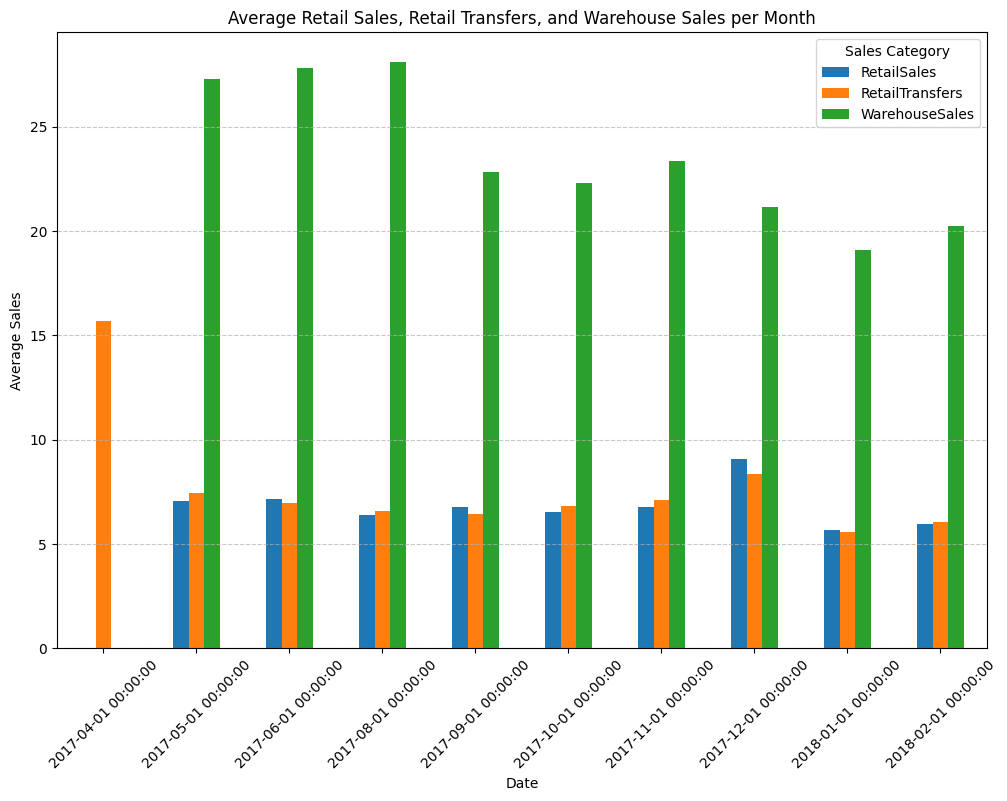

In [6]:

# Combine 'Year' and 'Month' columns and convert them to a date format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Group the data by 'Date' and calculate the average Retail Sales, Retail Transfers, and Warehouse Sales per month
average_sales_per_month = data.groupby('Date')[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()

# Create the bar chart
average_sales_per_month.plot(kind='bar', figsize=(12, 8))
plt.title('Average Retail Sales, Retail Transfers, and Warehouse Sales per Month')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Sales Category')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

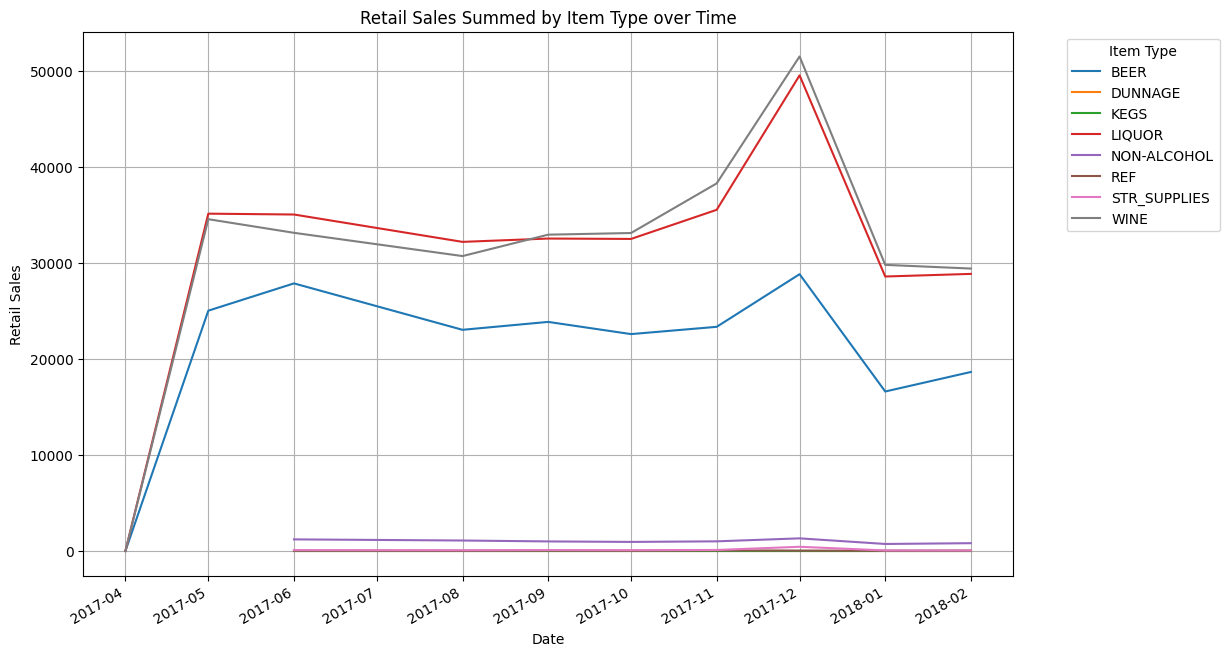

In [7]:
# Combine 'Year' and 'Month' columns and convert them to a date format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Group the data by 'Date' and 'Item Type' and calculate the total Retail Sales for each combination
retail_sales_by_item_type = data.groupby(['Date', 'ItemType'])['RetailSales'].sum().unstack()

# Create the multi-line chart
retail_sales_by_item_type.plot(kind='line', figsize=(12, 8))
plt.title('Retail Sales Summed by Item Type over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## 6. Plot the same information as above but as a bar chart.

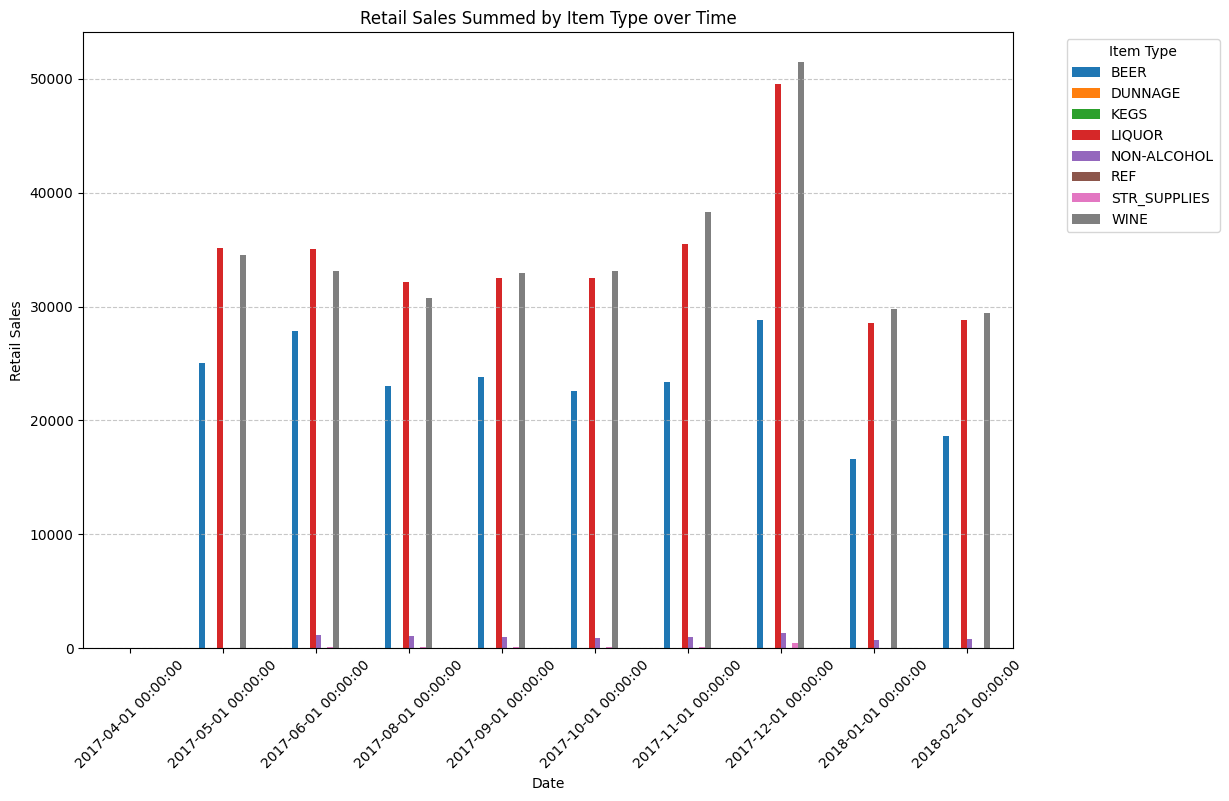

In [8]:
# Combine 'Year' and 'Month' columns and convert them to a date format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str))

# Group the data by 'Date' and 'Item Type' and calculate the total Retail Sales for each combination
retail_sales_by_item_type = data.groupby(['Date', 'ItemType'])['RetailSales'].sum().unstack()

# Create the bar chart
retail_sales_by_item_type.plot(kind='bar', figsize=(12, 8))
plt.title('Retail Sales Summed by Item Type over Time')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

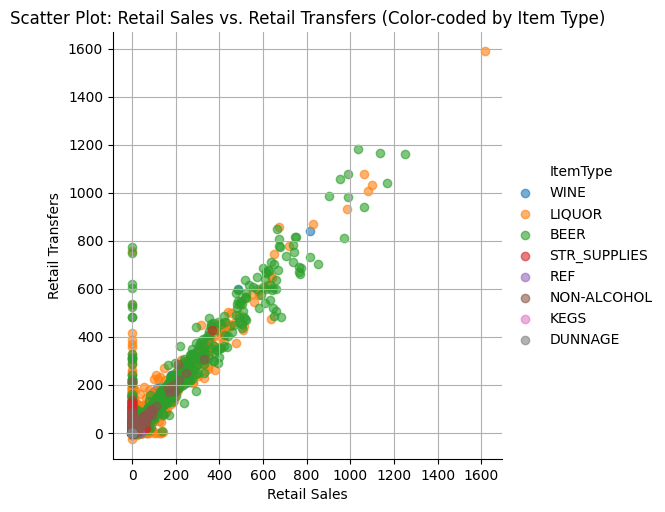

In [9]:
# Create the scatter plot with Seaborn's lmplot
sns.lmplot(x='RetailSales', y='RetailTransfers', data=data, hue='ItemType', fit_reg=False, scatter_kws={'alpha':0.6})
plt.title('Scatter Plot: Retail Sales vs. Retail Transfers (Color-coded by Item Type)')
plt.xlabel('Retail Sales')
plt.ylabel('Retail Transfers')
plt.grid(True)
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

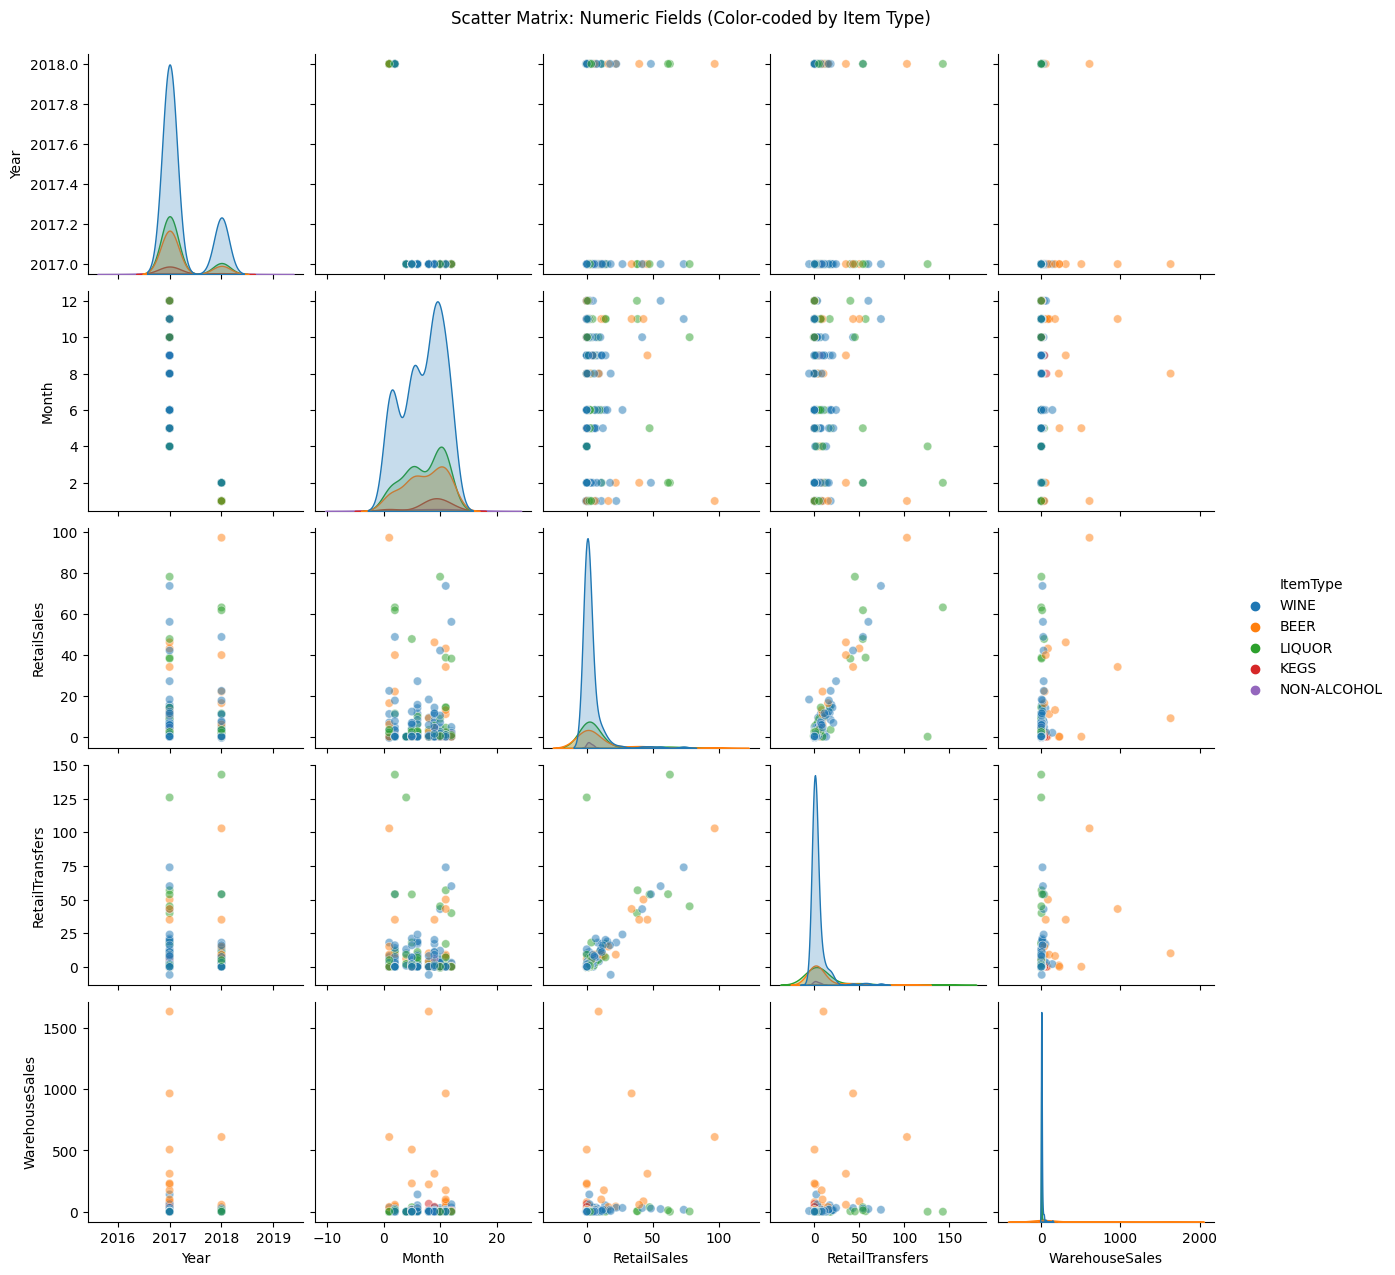

In [16]:
# Sample a random subset of the data (adjust the sample_size as needed)
sample_size = 300  
data_sample = data.sample(n=sample_size, random_state=42)

# Create the scatter matrix (pairplot) with Seaborn's pairplot
sns.pairplot(data_sample, hue='ItemType', plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Matrix: Numeric Fields (Color-coded by Item Type)', y=1.02)
plt.show()